In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(6479, 2)

In [3]:
df.head()

,Time,domain
0,2021-09-30 15:46:46,hangouts.google.com
1,2021-09-30 15:46:46,hangouts.google.com
2,2021-09-30 15:44:50,hangouts.google.com
3,2021-09-30 15:41:51,hangouts.google.com
4,2021-09-30 14:05:24,mail.google.com


In [4]:
df.tail()

,Time,domain
6474,1600-12-31 19:00:00,www.coursera.org
6475,1600-12-31 19:00:00,www.nytimes.com
6476,1600-12-31 19:00:00,www.mozilla.org
6477,1600-12-31 19:00:00,support.mozilla.org
6478,1600-12-31 19:00:00,support.mozilla.org


In [5]:
df.dtypes

Time      object
domain    object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

18

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df['domain'].value_counts()[:50]

photos.google.com                                    821
www.myntra.com                                       639
www.amazon.com                                       590
www.youtube.com                                      497
www.nykaa.com                                        458
www.google.com                                       362
mail.google.com                                      331
hangouts.google.com                                  188
www.flipkart.com                                      94
webauth.umbc.edu                                      86
www.ikea.com                                          78
us.shein.com                                          70
nyk0.page.link                                        67
www.countryliving.com                                 62
www.airbnb.com                                        59
www.target.com                                        54
play.hbomax.com                                       53
www.linkedin.com               

<AxesSubplot:>

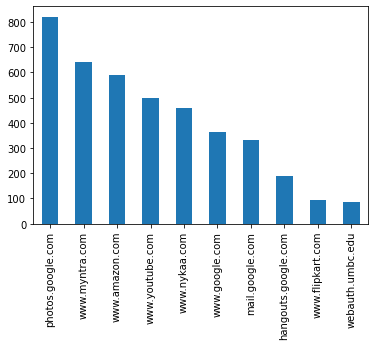

In [10]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [11]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      88
1      54
2      88
3      20
4      97
5      33
6      48
7      87
8      86
9     208
10    469
11    937
12    487
13    361
14    492
15    454
16    293
17    182
18    609
19    389
20    302
21    195
22    335
23    147
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

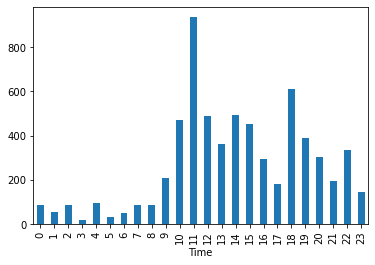

In [12]:
hourly_counts.plot.bar()

In [13]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-09-30 15:46:46,hangouts.google.com,Thursday,3
1,2021-09-30 15:46:46,hangouts.google.com,Thursday,3
2,2021-09-30 15:44:50,hangouts.google.com,Thursday,3
3,2021-09-30 15:41:51,hangouts.google.com,Thursday,3
4,2021-09-30 14:05:24,mail.google.com,Thursday,3


In [14]:
df['Day'].value_counts()

Monday       1503
Wednesday    1211
Tuesday      1087
Saturday      934
Friday        724
Thursday      683
Sunday        319
Name: Day, dtype: int64

In [15]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1503
1    1087
2    1211
3     683
4     724
5     934
6     319
Name: DayIndex, dtype: int64

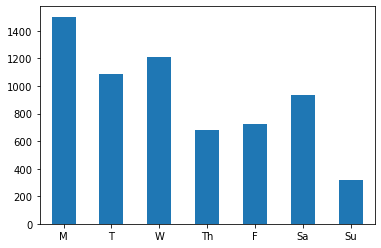

In [16]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [17]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-09-30 15:46:46,hangouts.google.com,Thursday,3,False
1,2021-09-30 15:46:46,hangouts.google.com,Thursday,3,False
2,2021-09-30 15:44:50,hangouts.google.com,Thursday,3,False
3,2021-09-30 15:41:51,hangouts.google.com,Thursday,3,False
4,2021-09-30 14:05:24,mail.google.com,Thursday,3,False


In [18]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [19]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
35,2021-09-26 21:14:35,www.youtube.com,Sunday,6,True
36,2021-09-26 21:12:46,www.youtube.com,Sunday,6,True
37,2021-09-26 06:30:25,github.com,Sunday,6,True
38,2021-09-25 16:40:24,us.shein.com,Saturday,5,True
39,2021-09-25 16:40:09,us.shein.com,Saturday,5,True


In [20]:
weekday['domain'].value_counts()[:5]

photos.google.com    616
www.myntra.com       588
www.amazon.com       494
www.youtube.com      358
www.nykaa.com        341
Name: domain, dtype: int64

In [21]:
weekend['domain'].value_counts()[:5]

photos.google.com    205
www.youtube.com      139
www.nykaa.com        117
www.amazon.com        96
www.myntra.com        51
Name: domain, dtype: int64

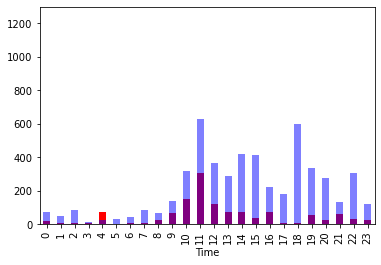

In [22]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [23]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

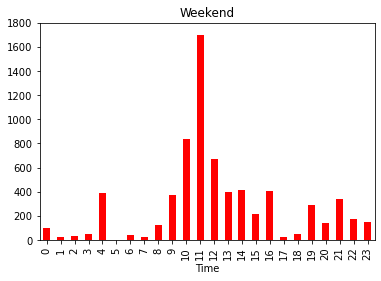

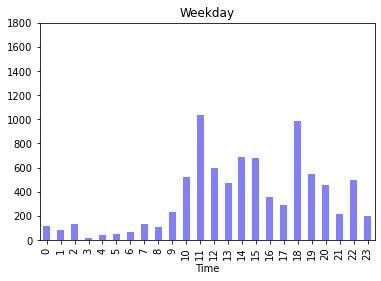

In [24]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [25]:
df['domain'].value_counts()[:50]

photos.google.com                                    821
www.myntra.com                                       639
www.amazon.com                                       590
www.youtube.com                                      497
www.nykaa.com                                        458
www.google.com                                       362
mail.google.com                                      331
hangouts.google.com                                  188
www.flipkart.com                                      94
webauth.umbc.edu                                      86
www.ikea.com                                          78
us.shein.com                                          70
nyk0.page.link                                        67
www.countryliving.com                                 62
www.airbnb.com                                        59
www.target.com                                        54
play.hbomax.com                                       53
www.linkedin.com               

In [26]:
df['domain'] = df['domain'].astype(str)

In [27]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

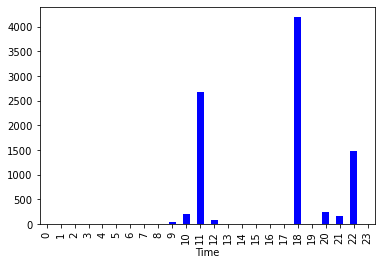

In [28]:
_= show_domain_stats('photos', 'blue')

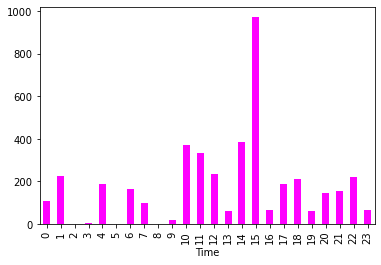

In [29]:
_ = show_domain_stats('myntra', 'magenta')


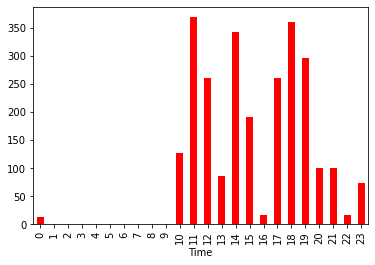

In [30]:
_ = show_domain_stats('amazon', 'red')


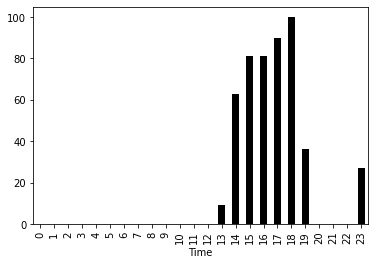

In [31]:
_=show_domain_stats('hbo', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1. This is a personal computer, since most of the sites visited are entertainment and shopping.
2. Person using this computer is not employed because he is mostly using in working hours for entertainment and shopping
3. Looking at the data top 3 out of 5 are shopping site so we can say shopping.
4. Highest site visited is google photos, so may be his interest is photo ghraphy or he likes to look at old photos all the time. More insights are needed to analyze further.

### What do you think about this assignment? ( 3 sentences at most! ) 

answer here

This was very fun assignment to do but honestly, I was shocked by the result. It highlighted google photos as most visited I was expecting it to be you tube or Netflix. Maybe because each photo you open it makes new entry with new URL.

__NOTE__: If you give your permission for another student to analyze your `history_cleaned.csv` please commit it with this hw file.

(Your name will stay confidencial)